Copyright 2022 Hanwen Zhang

Licensed under the Apache License, Version 2.0 (the "License");
Unless required by applicable law or agreed to in writing, software.
You may obtain a copy of the License at

       http://www.apache.org/licenses/LICENSE-2.0

Distributed under the License is distributed on an "AS IS" BASIS,
WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
See the License for the specific language governing permissions and
limitations under the License.

---
### Initial Configurations

In [1]:
import os
import networkx as nx
import multiprocessing as mp
import matplotlib.pyplot as plt
from concurrent.futures import ProcessPoolExecutor

from layers.composed_graph_layer import ComposedGraphLayer
from layers.vulnerability_layer import VulnerabilityLayer
from layers.merged_graph_layer import MergedGraphLayer
from layers.attack_graph_layer import AttackGraphLayer
from layers.topology_layer import TopologyLayer
from mio import wrapper

argv=['', 'atsea']
config, examples = wrapper.init(argv)

concurrency = config['nums-of-processes']
executor = None
if concurrency > 0:
    executor = ProcessPoolExecutor(concurrency, mp.get_context('forkserver'))

attack_vectors = VulnerabilityLayer.get_attack_vectors(config["attack-vector-folder-path"], executor)
example_folder, result_folder = wrapper.create_folders(argv[1], config)

times = 0

Reading NVD feed file: nvdcve-1.0-2007.json
Reading NVD feed file: nvdcve-1.0-2011.json
Reading NVD feed file: nvdcve-1.0-2010.json
Reading NVD feed file: nvdcve-1.1-2020.json
Reading NVD feed file: nvdcve-1.0-modified.json
Reading NVD feed file: nvdcve-1.0-2006.json
Reading NVD feed file: nvdcve-1.0-2016.json
Reading NVD feed file: nvdcve-1.0-2017.json
Reading NVD feed file: nvdcve-1.0-2015.json
Reading NVD feed file: nvdcve-1.0-2003.json
Reading NVD feed file: nvdcve-1.1-2021.json
Reading NVD feed file: nvdcve-1.0-2002.json
Reading NVD feed file: nvdcve-1.1-modified.json
Reading NVD feed file: nvdcve-1.0-2014.json
Reading NVD feed file: nvdcve-1.0-2018.json
Reading NVD feed file: nvdcve-1.0-2013.json
Reading NVD feed file: nvdcve-1.1-2019.json
Reading NVD feed file: nvdcve-1.0-2005.json
Reading NVD feed file: nvdcve-1.0-2009.json
Reading NVD feed file: nvdcve-1.0-2008.json
Reading NVD feed file: nvdcve-1.0-2004.json
Reading NVD feed file: nvdcve-1.0-2012.json
Reading NVD feed file: n

---
### Create topology layer

In [2]:
topology_layer = TopologyLayer(example_folder)

Topology parsing started.
Time for parsing topology: 0.00988316535949707 seconds.
Topology graph creation started.
Time for creating topology graphs: 0.00011110305786132812 seconds.
Time for initialising topology layer: 0.009994268417358398 seconds.


---
### Create vulnerability layer

In [3]:
vulnerability_layer = VulnerabilityLayer(topology_layer, config, attack_vectors)

Vulnerabilities parsing started.
Time for getting vulnerabilities in services: 0.02142500877380371 seconds.
Pre-processing vulnerabilities started.
Time for vulnerabilities pre-processing: 0.01665496826171875 seconds.
Time for vulnerability parser module: 0.03807997703552246 seconds.


---
### Getting the attack graphs for each network

In [4]:
attack_graph_layer = AttackGraphLayer(vulnerability_layer, executor)

Attack graphs of subnets generation started.
Generated sub attack graph for network 'payment'
Generated sub attack graph for network 'back-tier'
Generated sub attack graph for network 'exposed'
Generated sub attack graph for network 'front-tier'
Time for attack graphs of subnets generation: 0.009588956832885742 seconds.


---
### Composing attack graphs

In [5]:
composed_graph_layer = ComposedGraphLayer(attack_graph_layer)

Composing attack graphs from subnets started.
Time for composing subnets: 0.0014820098876953125 seconds.


---
### Merge attack graph nodes

In [ ]:
merged_graph_layer = MergedGraphLayer(composed_graph_layer)

---
### Print summaries

In [ ]:
wrapper.print_summary(merged_graph_layer)

---
### Change result folders

In [ ]:
times += 1

---
### draw topology graph

In [ ]:
plt.axis("off")
pos = nx.spring_layout(topology_layer.topology_graph)
nx.draw_networkx_nodes(topology_layer.topology_graph, pos)
nx.draw_networkx_edges(topology_layer.topology_graph, pos)
nx.draw_networkx_labels(topology_layer.topology_graph, pos)
plt.show()

Save topology graph to file

In [ ]:
topology_graph_folder = os.path.join(result_folder, str(times))
if not os.path.exists(topology_graph_folder):
    os.makedirs(topology_graph_folder)
topology_graph_path = os.path.join(topology_graph_folder, 'topology-graph.png')
plt.savefig(topology_graph_path, transparent=True)

---
### draw gateway graph

In [ ]:
plt.axis("off")
pos = nx.spring_layout(topology_layer.gateway_graph)
nx.draw_networkx_nodes(topology_layer.gateway_graph, pos)
nx.draw_networkx_edges(topology_layer.gateway_graph, pos)
nx.draw_networkx_labels(topology_layer.gateway_graph, pos)
nx.draw_networkx_edge_labels(topology_layer.gateway_graph, pos, edge_labels=topology_layer.gateway_graph_labels)
plt.show()

Save gateway graph to file

In [ ]:
gateway_graph_folder = os.path.join(result_folder, str(times))
if not os.path.exists(gateway_graph_folder):
    os.makedirs(gateway_graph_folder)
gateway_graph_path = os.path.join(gateway_graph_folder, 'gateway-graph.png')
plt.savefig(gateway_graph_path, transparent=True)

Reading NVD feed file: nvdcve-1.0-2009.json


---
### Draw composed graph

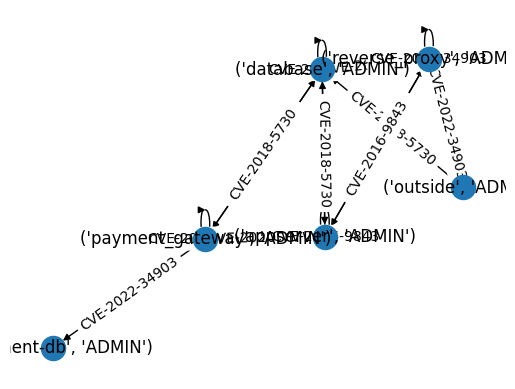

In [6]:
plt.axis("off")
pos = nx.spring_layout(composed_graph_layer.composed_graph)
nx.draw_networkx_nodes(composed_graph_layer.composed_graph, pos)
nx.draw_networkx_edges(composed_graph_layer.composed_graph, pos)
nx.draw_networkx_labels(composed_graph_layer.composed_graph, pos)
nx.draw_networkx_edge_labels(composed_graph_layer.composed_graph, pos, edge_labels=composed_graph_layer.composed_labels)
plt.show()

Save attack graph to file

In [ ]:
composed_graph_folder = os.path.join(result_folder, str(times))
if not os.path.exists(composed_graph_folder):
    os.makedirs(composed_graph_folder)
composed_graph_path = os.path.join(composed_graph_folder, 'composed-graph.png')
plt.savefig(composed_graph_path, transparent=True)

---
### Draw sub graphs

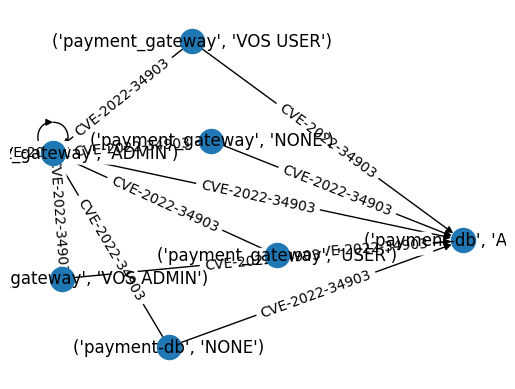

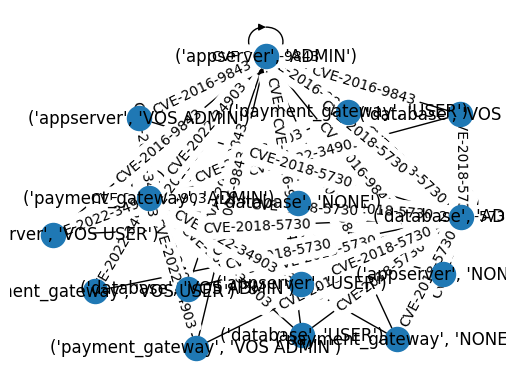

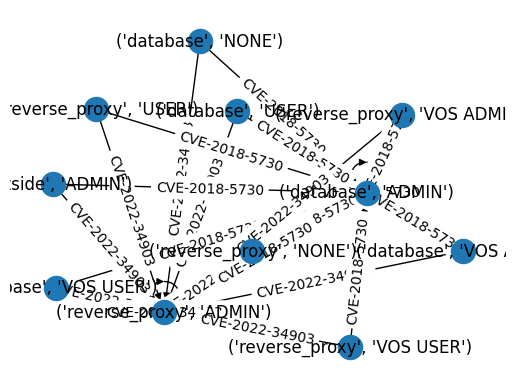

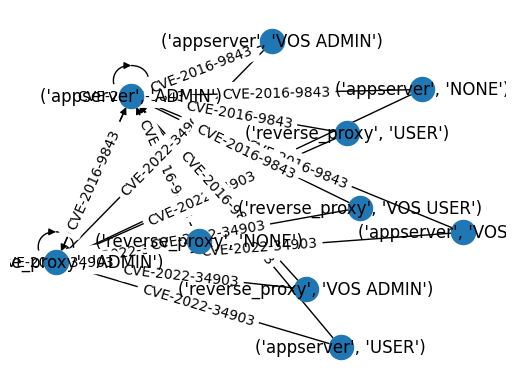

In [7]:
for network in attack_graph_layer.attack_graph:
    sub_graph = attack_graph_layer.attack_graph[network]
    sub_labels = attack_graph_layer.graph_labels[network]
    plt.axis("off")
    pos = nx.spring_layout(sub_graph)
    nx.draw_networkx_nodes(sub_graph, pos)
    nx.draw_networkx_edges(sub_graph, pos)
    nx.draw_networkx_labels(sub_graph, pos)
    nx.draw_networkx_edge_labels(sub_graph, pos, edge_labels=sub_labels)
    plt.show()

---
### Draw merged graph

In [ ]:
merged_graph_layer.merged_graph.add_edge('payment-db', 'payment_gateway')

In [ ]:
plt.axis("off")
pos = nx.spring_layout(merged_graph_layer.merged_graph)
nx.draw_networkx_nodes(merged_graph_layer.merged_graph, pos)
nx.draw_networkx_edges(merged_graph_layer.merged_graph, pos)
nx.draw_networkx_labels(merged_graph_layer.merged_graph, pos)
edge_labels = nx.get_edge_attributes(merged_graph_layer.merged_graph, 'possibility')
nx.draw_networkx_edge_labels(merged_graph_layer.merged_graph, pos, edge_labels)
# nx.draw(merged_graph_layer.merged_graph, pos, connectionstyle='arc3, rad=0.1')
plt.show()

save merged graph

In [ ]:
merged_graph_folder = os.path.join(result_folder, str(times))
if not os.path.exists(merged_graph_folder):
        os.makedirs(merged_graph_folder)
merged_graph_path = os.path.join(merged_graph_folder, 'merged-graph.png')
plt.savefig(merged_graph_folder, transparent=True)
print('Merged graph is at:', merged_graph_path)

---
### Add container to a network

In [ ]:
name = 'test'
new_service = {'image': 'nginx', 'networks': ['db', 'backend']}

merged_graph_layer[name] = new_service

---
### Delete container by name

In [ ]:
name = 'test'

del merged_graph_layer[name]

---
### Generate honeypot defenses

In [ ]:
to = 'payment-db'
minimum = 0

path_counts = merged_graph_layer.gen_defence_list(to)

In [ ]:
print(f'Possibility before deploying: {merged_graph_layer.get_bayesian_possibility(to)}\n')
merged_graph_layer.deploy_honeypot(path_counts, minimum)
print(f'\nPossibility after deploying: {merged_graph_layer.get_bayesian_possibility(to)}')

---
### Generate example folders

In [ ]:
import compose_generator
for rg in [1, 5, 10]:
    compose_generator.generate_designed(rg)
    compose_generator.generate_full_conn(rg)
for rg in range(50, 1001, 50):
    compose_generator.generate_designed(rg)
    compose_generator.generate_full_conn(rg)